In [1]:
import matplotlib.pyplot as plt
import numpy as np
from aes_algo.aes import *
from des_algo.trides import *
from rsa_algo.rsa import *
import pandas as pd
from time import perf_counter
from tqdm import tqdm

# generic settings
plt.style.use('seaborn-whitegrid')

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
        titleweight='bold', titlesize=18, titlepad=10)

In [2]:
col = 'password'
dataframe = pd.read_csv('data.csv', header = 0, usecols=["password"]) # ISO-8859-1
dataframe = dataframe.astype('str')
def is_ascii_safe(frame):
    res = []
    for string in frame:
        for s in string:
            if ord(s) > 126:
                res.append(False)
                break
        if ord(s) <= 126:
            res.append(True)
    return res
cond = is_ascii_safe(dataframe[col])
dataframe = dataframe[cond]
dataframe

,password
0,kzde5577
1,kino3434
2,visi7k1yr
3,megzy123
4,lamborghin1
...,...
669787,10redtux10
669788,infrared1
669789,184520socram
669790,marken22a


In [3]:
random_state = 0
sizes = [1000 * i for i in range(1, 20 + 1)]
samples = [dataframe[col].sample(n=s) for s in sizes]



In [4]:
def benchmark(sample, verbose = False):
    k = triple_des("DESCRYPTDESCRY--", ECB, pad=None, padmode=PAD_PKCS5)
    aes_sub_key = key_expansion("1234567890123456")
    tot_enc_aes = []
    tot_dec_aes = []
    tot_enc_des = []
    tot_dec_des = []
    tot_enc_rsa = []
    tot_dec_rsa = []
    # Huge decryption key made RSA slow
    enc_key, dec_key = gen_key(P100, Q100)

    # using tqdm so we can easily see progress
    for d in tqdm(sample):
        start = perf_counter()
        result = encrypt(str(d), aes_sub_key)
        tot_enc_aes.append(perf_counter() - start)
        start = perf_counter()
        dec_res = decrypt(result, aes_sub_key)
        tot_dec_aes.append(perf_counter() - start)

        start = perf_counter()
        result = k.encrypt(str(d))
        tot_enc_des.append(perf_counter() - start)
        start = perf_counter()
        dec_res = k.decrypt(result)
        tot_dec_des.append(perf_counter() - start)

        start = perf_counter()
        result = encrypt_string(str(d), *enc_key)
        tot_enc_rsa.append(perf_counter() - start)
        start = perf_counter()
        dec_res = decrypt_string(result, *dec_key)
        tot_dec_rsa.append(perf_counter() - start)
    
    tott_enc_aes = sum(tot_enc_aes)
    tott_dec_aes = sum(tot_dec_aes)
    tott_enc_des = sum(tot_enc_des)
    tott_dec_des = sum(tot_dec_des)
    tott_enc_rsa = sum(tot_enc_rsa)
    tott_dec_rsa = sum(tot_dec_rsa)
    if verbose:
        print(f"total time encrypt (aes): {sum(tott_enc_aes)}")
        print(f"total time decrypt (aes): {sum(tott_dec_aes)}")
        print(f"total time encrypt (des): {sum(tott_enc_des)}")
        print(f"total time decrypt (des): {sum(tott_dec_des)}")
        print(f"total time encrypt (rsa): {sum(tott_enc_rsa)}")
        print(f"total time decrypt (rsa): {sum(tott_dec_rsa)}")
    return (tott_enc_aes, tott_dec_aes), (tott_enc_des, tott_dec_des), (tott_enc_rsa, tott_dec_rsa)

In [5]:
times = []
for sample in samples:
    times.append(benchmark(sample))

(e * d) % phi = 1


100%|██████████| 1000/1000 [00:18<00:00, 54.22it/s]


(e * d) % phi = 1


100%|██████████| 2000/2000 [00:36<00:00, 55.21it/s]


(e * d) % phi = 1


100%|██████████| 3000/3000 [00:53<00:00, 55.56it/s]


(e * d) % phi = 1


100%|██████████| 4000/4000 [01:12<00:00, 55.44it/s]


(e * d) % phi = 1


100%|██████████| 5000/5000 [01:29<00:00, 55.67it/s]


(e * d) % phi = 1


100%|██████████| 6000/6000 [01:47<00:00, 55.64it/s]


(e * d) % phi = 1


100%|██████████| 7000/7000 [02:05<00:00, 55.57it/s]


(e * d) % phi = 1


100%|██████████| 8000/8000 [02:24<00:00, 55.31it/s]


(e * d) % phi = 1


100%|██████████| 9000/9000 [02:42<00:00, 55.31it/s]


(e * d) % phi = 1


100%|██████████| 10000/10000 [03:00<00:00, 55.43it/s]


(e * d) % phi = 1


100%|██████████| 11000/11000 [03:18<00:00, 55.32it/s]


(e * d) % phi = 1


100%|██████████| 12000/12000 [03:36<00:00, 55.40it/s]


(e * d) % phi = 1


100%|██████████| 13000/13000 [03:57<00:00, 54.63it/s]


(e * d) % phi = 1


100%|██████████| 14000/14000 [04:16<00:00, 54.54it/s]


(e * d) % phi = 1


100%|██████████| 15000/15000 [04:36<00:00, 54.20it/s]


(e * d) % phi = 1


100%|██████████| 16000/16000 [04:54<00:00, 54.38it/s]


(e * d) % phi = 1


100%|██████████| 17000/17000 [05:13<00:00, 54.19it/s]


(e * d) % phi = 1


100%|██████████| 18000/18000 [05:30<00:00, 54.41it/s]


(e * d) % phi = 1


100%|██████████| 19000/19000 [05:45<00:00, 54.92it/s]


(e * d) % phi = 1


100%|██████████| 20000/20000 [06:01<00:00, 55.27it/s]


In [8]:
aes_times, des_times, rsa_times = [], [], []
for aest, dest, rsat in times:
    aes_times.append(aest)
    des_times.append(dest)
    rsa_times.append(rsat)


In [10]:
aes_enc_times = []
aes_dec_times = []
des_enc_times = []
des_dec_times = []
rsa_enc_times = []
rsa_dec_times = []
for enct, dect in aes_times:
    aes_enc_times.append(enct)
    aes_dec_times.append(dect)
for enct, dect in des_times:
    des_enc_times.append(enct)
    des_dec_times.append(dect)
for enct, dect in rsa_times:
    rsa_enc_times.append(enct)
    rsa_dec_times.append(dect)

Text(0.5, 1.0, 'AES')

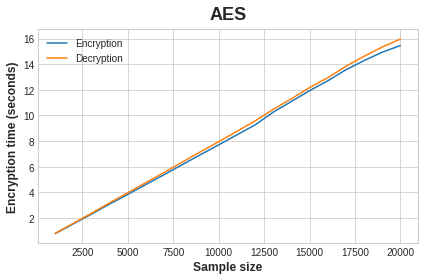

In [20]:
plt.plot(sizes, aes_enc_times, label="Encryption")
plt.plot(sizes, aes_dec_times, label="Decryption")
plt.ylabel("Processing time (seconds)")
plt.xlabel("Sample size")
plt.legend()
plt.title("AES")

Text(0.5, 1.0, '3DES')

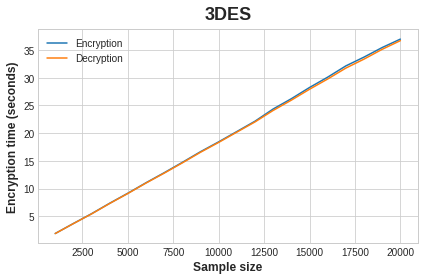

In [22]:
plt.plot(sizes, des_enc_times, label="Encryption")
plt.plot(sizes, des_dec_times, label="Decryption")
plt.ylabel("Processing time (seconds)")
plt.xlabel("Sample size")
plt.legend()
plt.title("3DES")

Text(0.5, 1.0, 'RSA')

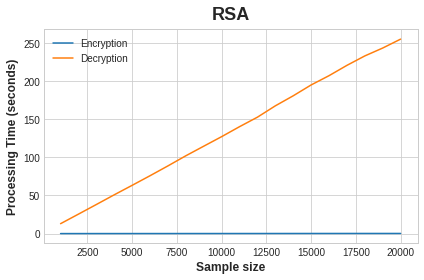

In [29]:
plt.plot(sizes, rsa_enc_times, label="Encryption")
plt.plot(sizes, rsa_dec_times, label="Decryption")
plt.ylabel("Processing Time (seconds)")
plt.xlabel("Sample size")
plt.legend()
plt.title("RSA")

Text(0.5, 1.0, 'Encryption Comparison')

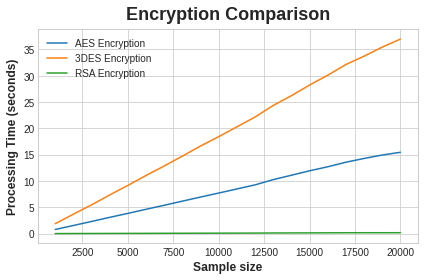

In [31]:
plt.plot(sizes, aes_enc_times, label="AES")
plt.plot(sizes, des_enc_times, label="3DES")
plt.plot(sizes, rsa_enc_times, label="RSA")
plt.ylabel("Processing Time (seconds)")
plt.xlabel("Sample size")
plt.legend()
plt.title("Encryption Comparison")

Text(0.5, 1.0, 'Decryption Comparison')

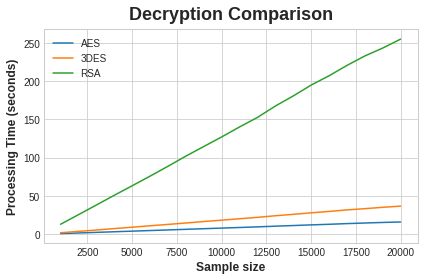

In [33]:
plt.plot(sizes, aes_dec_times, label="AES")
plt.plot(sizes, des_dec_times, label="3DES")
plt.plot(sizes, rsa_dec_times, label="RSA")
plt.ylabel("Processing Time (seconds)")
plt.xlabel("Sample size")
plt.legend()
plt.title("Decryption Comparison")